# Dissimilarity based on histogram analysis
Each voxet produces an histogram of values. The distance between two histograms is computed as the [Jensen-Shanon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence), a symmetrized and smooth version of the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence).

Given two random variables $P$ and $Q$, the Jenson-Shanon divergence is conmputed as <br>
JSD$(P||Q)= {{1} \over {2}} $KLD$(P||M) + {{1} \over {2}} $KLD$(Q||M)$, where $M = {{P+Q} \over {2}} $ and KLD is the Kullback-Leibler divergence.

It requires $P$ and $Q$ to share the same support $\mathcal{X}$ can be computed for continuous or discrete variables. Here, we assume that the support of our random variables is discrete and of size $n$ (possibly $n$ bins for discretized continuous variables).

Denoting the support of $P$ and $Q$ by $(x_i)_{i=1 \dots n}$, $p_i=\text{Prob}(P=x_i)$, $q_i=\text{Prob}(Q=x_i)$ and $m_i = {{p_i+q_i} \over {2}}$, the Jenson-Shanon divergence is computed as:

JSD$(P||Q) = {{1} \over {2}} \sum \limits _{i=1}^{n} p_i ln \left({{p_i}\over{m_i}} \right) + {{1} \over {2}} \sum \limits _{i=1}^{n} q_i ln \left({{q_i}\over{m_i}} \right)$

In [1]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import manifold
import pickle
from uncertaintyIndicators import jsdist_hist

picklefilenamehisto = "./pickledata/testing-model-subset-histogram.pickle"
picklefilenamedata = "./pickledata/testing-model-subset.pickle"
sample_num1 = 9
sample_num2 = 2
myseed = 65432
nbins = 20

# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)

nsamples = len(samples_ix)

base = np.e

## Histogram based distance illustration

03-Jun-2021 (23:52:19) - COMPUTING HISTOGRAM BASED DENSITY START


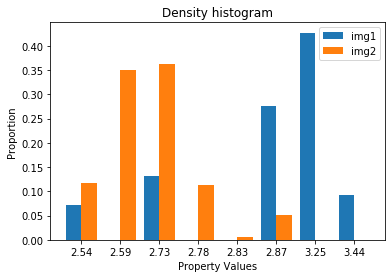

03-Jun-2021 (23:52:20) - COMPUTING HISTOGRAM BASED DENSITY END


In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DENSITY START")
tmp1 = rho_all[:,:,:,sample_num1] # for illustration, we consider the density field of random sample #9
tmp2 = rho_all[:,:,:,sample_num2] # for illustration, we consider the density field of random sample #2
dist_hist_rho = jsdist_hist(tmp1,tmp2,nbins,base,plot=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DENSITY END")

## Compute for all pairs of voxets

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DIST ALL START")

dist_hist_mag = np.zeros((nsamples,nsamples))
dist_hist_grv = np.zeros((nsamples,nsamples))
dist_hist_mod = np.zeros((nsamples,nsamples))
dist_hist_rho = np.zeros((nsamples,nsamples))
dist_hist_sus = np.zeros((nsamples,nsamples))

k=0
for i in range(nsamples):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_hist_mag[i,j] = jsdist_hist(mag_all[:,:,i],mag_all[:,:,j],nbins,base)
        dist_hist_grv[i,j] = jsdist_hist(grv_all[:,:,i],grv_all[:,:,j],nbins,base)
        dist_hist_mod[i,j] = jsdist_hist(mod_all[:,:,:,i],mod_all[:,:,:,j],nbins,base)
        dist_hist_rho[i,j] = jsdist_hist(rho_all[:,:,:,i],rho_all[:,:,:,j],nbins,base)
        dist_hist_sus[i,j] = jsdist_hist(sus_all[:,:,:,i],sus_all[:,:,:,j],nbins,base)
        dist_hist_mag[j,i] = dist_hist_mag[i,j]
        dist_hist_grv[j,i] = dist_hist_grv[i,j]
        dist_hist_mod[j,i] = dist_hist_mod[i,j]
        dist_hist_rho[j,i] = dist_hist_rho[i,j]
        dist_hist_sus[j,i] = dist_hist_sus[i,j]

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DIST ALL END")

## Multi-Dimensional Scaling representation

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION START")

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=myseed,
                   dissimilarity="precomputed", n_jobs=1)

mdspos_mag = mds.fit(dist_hist_mag).embedding_
mdspos_grv = mds.fit(dist_hist_grv).embedding_
mdspos_mod = mds.fit(dist_hist_mod).embedding_
mdspos_rho = mds.fit(dist_hist_rho).embedding_
mdspos_sus = mds.fit(dist_hist_sus).embedding_

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
s = 100
plt.scatter(mdspos_mag[:, 0], mdspos_mag[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='mag', marker='o')
plt.scatter(mdspos_grv[:, 0], mdspos_grv[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='grv', marker='^')
plt.scatter(mdspos_mod[:, 0], mdspos_mod[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='litho', marker='v')
plt.scatter(mdspos_rho[:, 0], mdspos_rho[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='rho', marker='<')
plt.scatter(mdspos_sus[:, 0], mdspos_sus[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='sus. mag.', marker='>')
plt.legend(scatterpoints=1, loc='best', shadow=False)
ax.set_title('2D Multi-Dimensional Scaling Representation of (dis-)similarities')
plt.show()

ix=np.tril_indices(nsamples,k=-1)
df= pd.DataFrame({'mag':dist_hist_mag[ix], 'grv':dist_hist_grv[ix], 'litho':dist_hist_mod[ix], 'rho':dist_hist_rho[ix], 'sus':dist_hist_sus[ix]})
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION END")


## Save indicators

In [ ]:
with open(picklefilenamehisto, 'wb') as f:
    pickle.dump([dist_hist_mag,dist_hist_grv,dist_hist_mod,dist_hist_rho,dist_hist_sus,
                 mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus], f)